# Logistic Regression from scratch

In [10]:
import pandas as pd
import numpy as np

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix

In [189]:
import matplotlib.pyplot as plt

In [15]:
def sigmoid(x):
    return 1/(1+exp(-x))

In [196]:
def logistic_regression(x,y,l=0.1,ne=100):
    w=np.random.rand(x.shape[1],1)
    c=0
    n=len(y)
    J=np.zeros(ne)
    for i in range(ne):
        z=np.dot(x,w)+c
        yh=1/(1+np.exp(z))
        dz=y-yh
        w-=l*np.dot(np.transpose(x),dz)
        c-=l*sum(dz)/n
        J[i]=-sum(y*np.log(yh)+(1-y)*np.log(1-yh))/n
    return w,c,J

In [219]:
def predict(x,w,c):
    z=np.dot(x,w)+c
    yh=1/(1+np.exp(z))
    yh[yh<=0.5]=0
    yh[yh>0.5]=1
    return yh

### Dataset for testing

In [23]:
df=pd.read_csv('breast_cancer_data.csv')

In [243]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,1.00,1.00,1.00,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.00,1.00,1.00,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.00000
2,0,19.69,21.25,130.00,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.1043,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [227]:
df.shape

(569, 31)

In [261]:
df.iloc[:,1].isna().sum()

0

In [255]:
df.index[2]

2

In [248]:
df.loc[1,'diagnosis']

1

In [242]:
df.drop(df[df.iloc[:,1]==1].index,axis=0)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
5,0,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [48]:
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [34]:
df.drop(labels='id',axis=1,inplace=True)

In [63]:
df.dropna(axis=1,inplace=True)

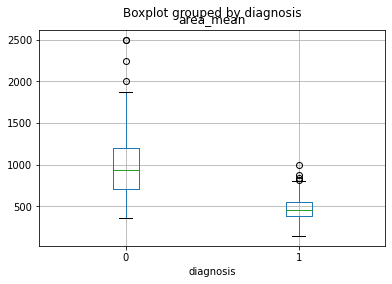

In [224]:
df.boxplot(column='area_mean',by='diagnosis')

In [46]:
df['diagnosis'].replace(['M','B'],[0,1],inplace=True)

In [56]:
Y=np.array(df['diagnosis'])

In [59]:
Y.shape

(569, 1)

In [58]:
Y=Y.reshape(len(Y),1)

In [74]:
X=np.array(df.drop(['diagnosis'],axis=1))

In [75]:
X.shape

(569, 30)

In [79]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [83]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [210]:
w,c,J=logistic_regression(X_train,Y_train,0.01,50)

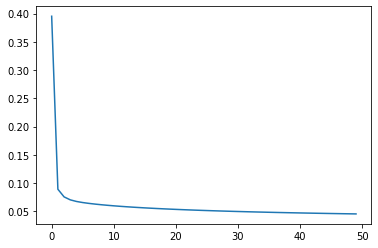

In [211]:
plt.plot(J)

In [111]:
X_train.shape[1]

30

In [220]:
yh=predict(X_test,w,c)

In [154]:
yh.shape

(114, 1)

In [157]:
yh[1]

array([0.])

In [221]:
accuracy_score(yh,Y_test)

0.9649122807017544

In [222]:
confusion_matrix(yh,Y_test)

array([[42,  2],
       [ 2, 68]], dtype=int64)